In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [20]:
def bit(img):
    pix=img.reshape(-1,3)
    Max=np.max(np.max(pix,axis=0))
    bits=np.log2(Max)
    if type(bits)!=int:
        bits=int(bits)+1
    else:
        bits=int(bits)
    return bits

Problem 1

(1) Nearest Neighbour
In this, each pixcel position of the new or enhanced image is scaled by a factor ((x of original image)/(x of new image) and (y of original image)/(y of new image)) and is rounded off to its nearest integer to get pixel value from the original image. In this manner each pixel of original image gets its nearest neighbour pixel value for the new or enhanced image.

In [10]:
def neighbor(OrIm):
    if (1.5*np.shape(OrIm)[0]-int(1.5*np.shape(OrIm)[0]))!=0.0:
        x=int(1.5*np.shape(OrIm)[0])+1
    else:
        x=int(1.5*np.shape(OrIm)[0])

    if (1.5*np.shape(OrIm)[1]-int(1.5*np.shape(OrIm)[1]))!=0.0:
        y=int(1.5*np.shape(OrIm)[1])+1
    else:
        y=int(1.5*np.shape(OrIm)[1])

    ZoomMat1=np.int_(np.zeros((x,y,np.shape(OrIm)[2])))
    xfact=np.shape(OrIm)[0]/x
    yfact=np.shape(OrIm)[1]/y
    for i in range(np.shape(ZoomMat1)[0]):
        for j in range(np.shape(ZoomMat1)[1]):
            ZoomMat1[i][j]=OrIm[round(i*xfact)][round(j*yfact)]
    return ZoomMat1 


Text(0.5, 1.0, 'Original Image 1')

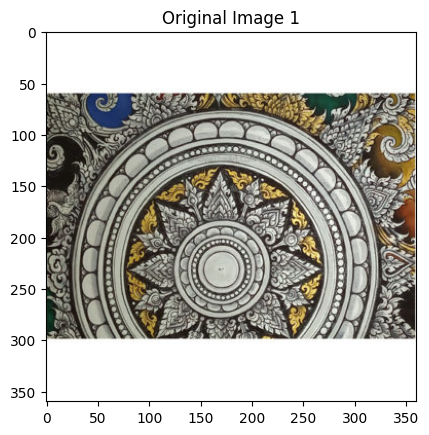

In [28]:
OrIm1=mpimg.imread("pattern.jpg")
plt.imshow(OrIm1)
plt.title("Original Image 1")

Text(0.5, 1.0, 'Zoom Image 1')

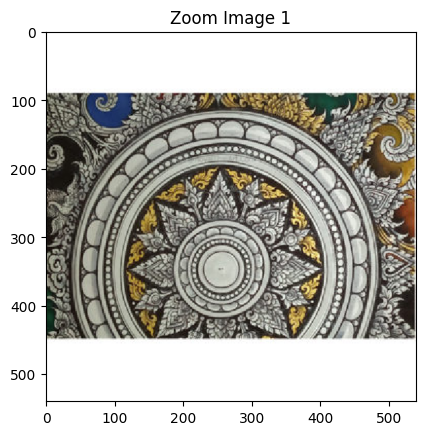

In [16]:
ZoomImg1=neighbor(OrIm1)
plt.imshow(ZoomImg1)
plt.title("Zoom Image 1")

Text(0.5, 1.0, 'Original Image 2')

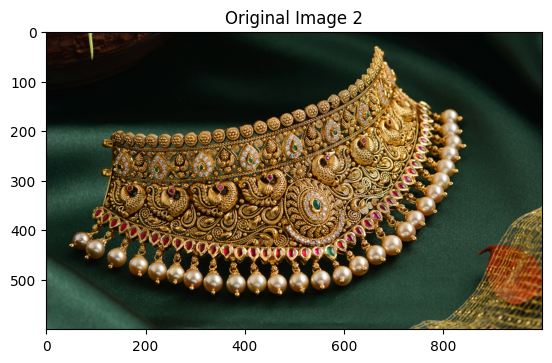

In [25]:
OrIm2=mpimg.imread("jwellery.jpg")
plt.imshow(OrIm2)
plt.title("Original Image 2")

Text(0.5, 1.0, 'Zoom Image 2')

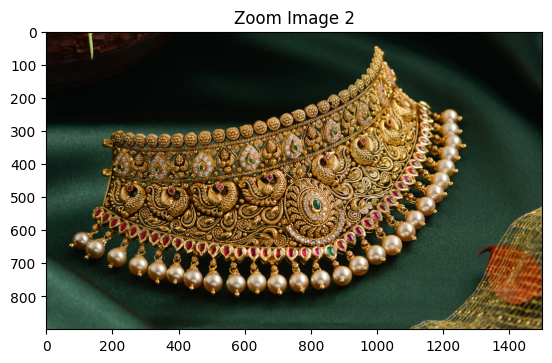

In [57]:
ZoomImg2=neighbor(OrIm2)
plt.imshow(ZoomImg2)
plt.title("Zoom Image 2")

Text(0.5, 1.0, 'Original Image 3')

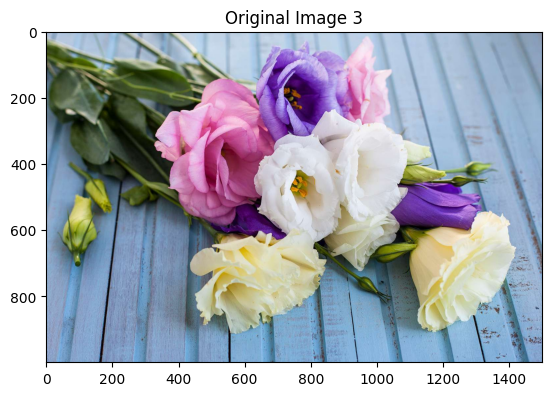

In [27]:
OrIm3=mpimg.imread("flowers.jpg")
plt.imshow(OrIm3)
plt.title("Original Image 3")

Text(0.5, 1.0, 'Zoom Image 3')

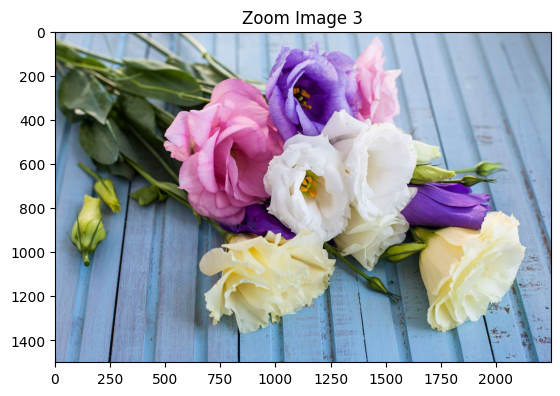

In [20]:
ZoomImg3=neighbor(OrIm3)
plt.imshow(ZoomImg3)
plt.title("Zoom Image 3")

(2) Bilinear Interpolation

In [87]:
def bilinear_interpolation(OrIm):
    height = OrIm.shape[0]
    width = OrIm.shape[1]
    if (1.5*np.shape(OrIm)[0]-int(1.5*np.shape(OrIm)[0]))!=0.0:
        y=int(1.5*np.shape(OrIm)[0])+1
    else:
        y=int(1.5*np.shape(OrIm)[0])

    if (1.5*np.shape(OrIm)[1]-int(1.5*np.shape(OrIm)[1]))!=0.0:
        x=int(1.5*np.shape(OrIm)[1])+1
    else:
        x=int(1.5*np.shape(OrIm)[1])

    ZoomMat2=np.int_(np.zeros((y,x,np.shape(OrIm)[2])))
    yfact=np.shape(OrIm)[0]/y
    xfact=np.shape(OrIm)[1]/x

    for k in range(3):
        for i in range(y):
            for j in range(x):
                x1=(j+0.5)*(xfact)-0.5
                y1=(i+0.5)*(yfact)-0.5

                x2 = int(x1)
                y2 = int(y1)

                x2 = min(x2, width-2)
                y2 = min(y2, height-2)

                x_diff=x1-x2
                y_diff=y1-y2

                a=OrIm[y2, x2, k]
                b=OrIm[y2, x2+1, k]
                c=OrIm[y2+1, x2, k]
                d=OrIm[y2+1, x2+1, k]

                PixelValue = a*(1-x_diff)*(1-y_diff) + b*(x_diff) * \
                    (1-y_diff) + c*(1-x_diff) * (y_diff) + d*x_diff*y_diff

                ZoomMat2[i][j][k] = PixelValue.astype(np.uint8)

    return ZoomMat2

Text(0.5, 1.0, 'Original Image 1')

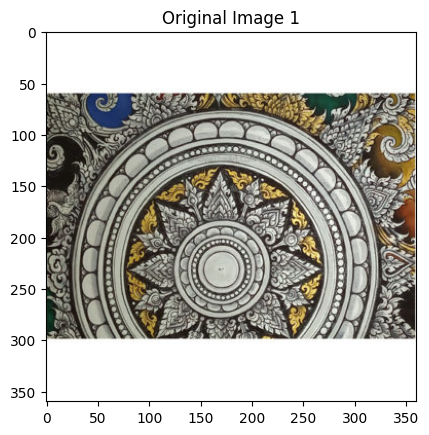

In [70]:
OrIm1=mpimg.imread("pattern.jpg")
plt.imshow(OrIm1)
plt.title("Original Image 1")

Text(0.5, 1.0, 'Zoom Image 1')

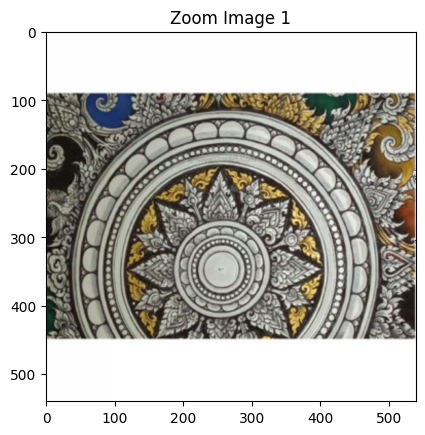

In [71]:
ZoomImg1=bilinear_interpolation(OrIm1)
plt.imshow(ZoomImg1)
plt.title("Zoom Image 1")

Text(0.5, 1.0, 'Original Image 2')

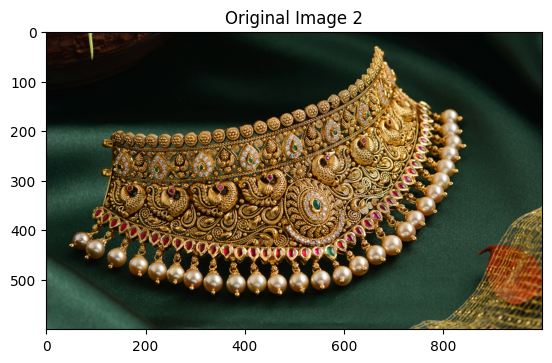

In [77]:
OrIm2=mpimg.imread("jwellery.jpg")
plt.imshow(OrIm2)
plt.title("Original Image 2")

Text(0.5, 1.0, 'Zoom Image 2')

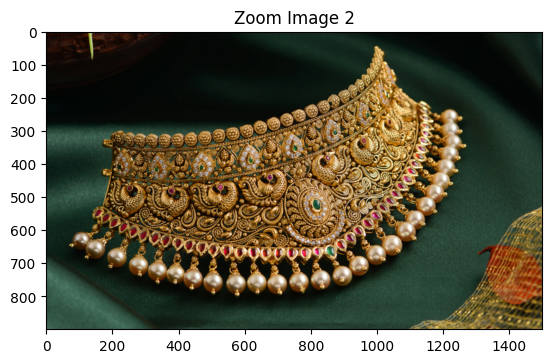

In [88]:
ZoomImg2=bilinear_interpolation(OrIm2)
plt.imshow(ZoomImg2)
plt.title("Zoom Image 2")

Text(0.5, 1.0, 'Original Image 3')

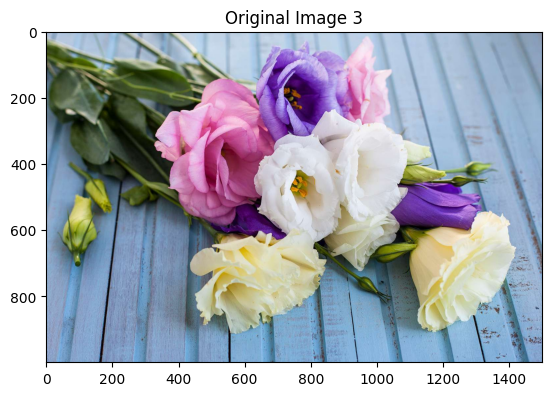

In [89]:
OrIm3=mpimg.imread("flowers.jpg")
plt.imshow(OrIm3)
plt.title("Original Image 3")

Text(0.5, 1.0, 'Zoom Image 3')

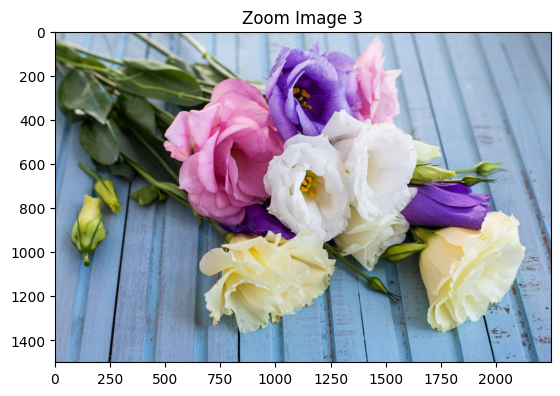

In [90]:
ZoomImg3=bilinear_interpolation(OrIm3)
plt.imshow(ZoomImg3)
plt.title("Zoom Image 3")

An image can be enhanced by both nearest neighbour as well as bilinear interpolation. Bilinear interpolation has better image quality then nearest neighbour (as nearest neighbour contains some disturbance) at the cost of computation i.e. bilinear interpolation has very high computation and thus takes more time for computing the image.

Problem 2

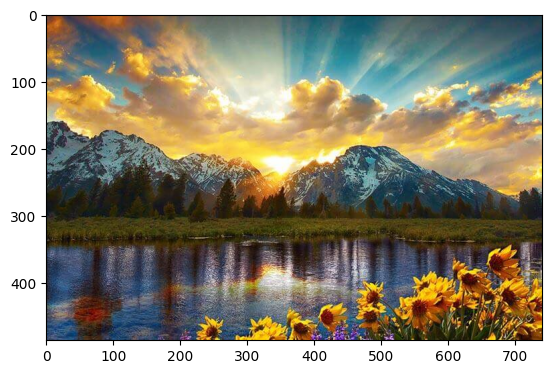

In [11]:
Img=mpimg.imread("Landscape-Photography-steps.jpg")
plt.imshow(Img)

(1)

In [95]:
def histplot(Img):
    gray=np.int_((0.299*Img[:,:,0]+0.587*Img[:,:,1]+0.114*Img[:,:,2]))
    pix,count=np.unique(gray,return_counts=True)
    plt.plot(pix,count)

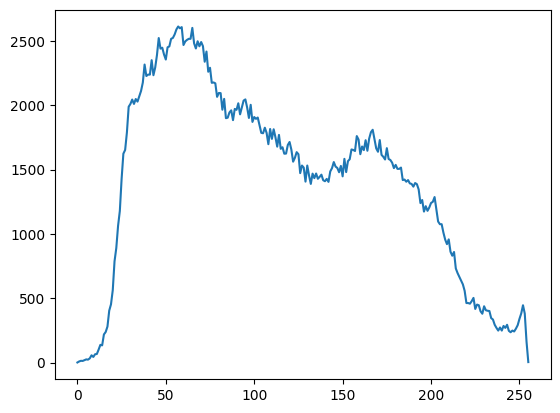

In [19]:
histplot(Img)

Histogram for images of above question

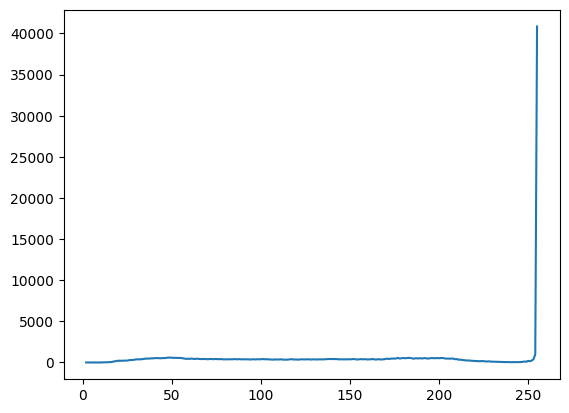

In [96]:
histplot(OrIm1)

Since the above histogram has only one peak, it is a unimodal.

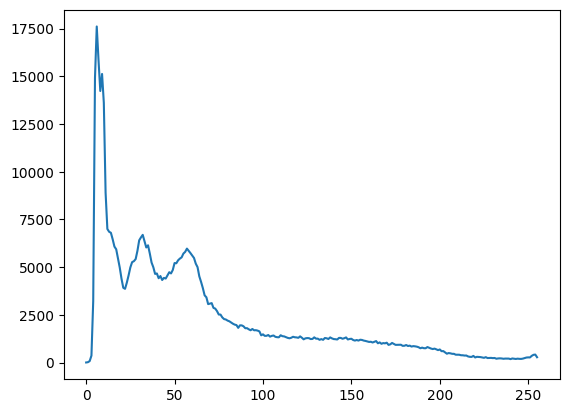

In [97]:
histplot(OrIm2)

Above histogram has more than one peak hence it is multimodal.

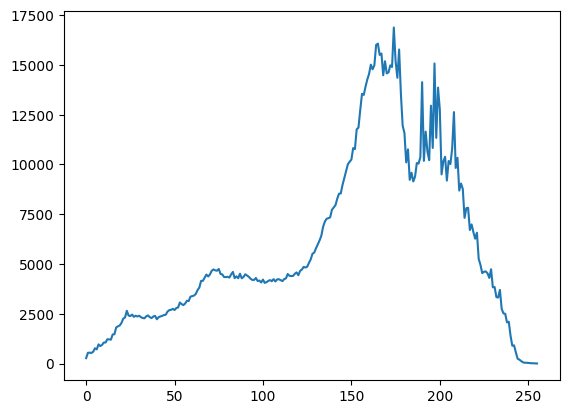

In [98]:
histplot(OrIm3)

The above histogram contains several peaks. Hence it is multimodal.

(2)

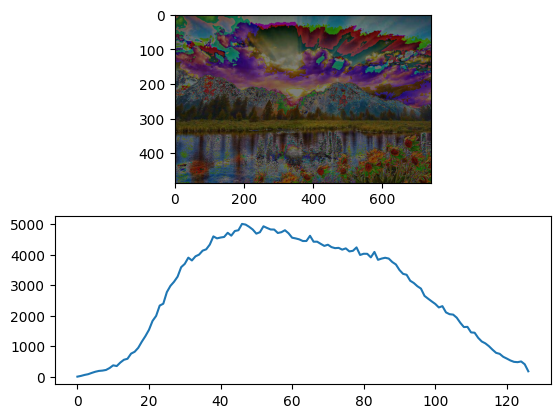

In [35]:
bits=bit(Img)
Img1=Img.reshape(-1,3)
MSB0=[]
for i in range(np.shape(Img1)[0]):
    msb=[]
    for j in range(np.shape(Img1)[1]):
        if Img1[i][j]>=128:
            msb.append(Img1[i][j]-128)
        else:
            msb.append(Img1[i][j])
    MSB0.append(np.array(msb))
MSB0=np.array(MSB0)
MSB0=MSB0.reshape(np.shape(Img))
plt.subplot(2,1,1)
plt.imshow(MSB0)
plt.subplot(2,1,2)
histplot(MSB0)

It has intensity values from 0 to 127 with maximum intensities between 20 to 100 while histogram of original image has wide range of intensities having large number of intensities.

(3)

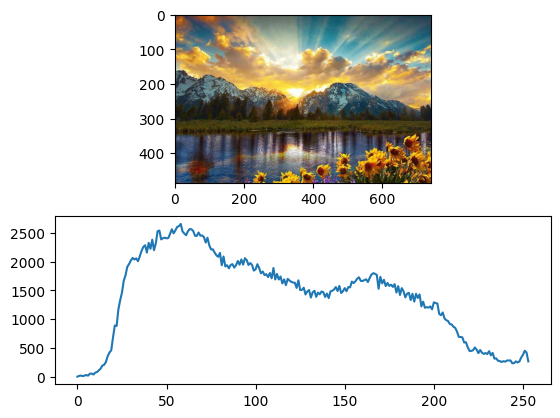

In [32]:
bits=bit(Img)
Img2=Img.reshape(-1,3)
LSB0=[]
for i in range(np.shape(Img2)[0]):
    lsb=[]
    for j in range(np.shape(Img2)[1]):
        if np.mod(Img2[i][j],2)!=0:
            lsb.append(Img2[i][j]-1)
        else:
            lsb.append(Img2[i][j])
    LSB0.append(np.array(lsb))
LSB0=np.array(LSB0)
LSB0=LSB0.reshape(np.shape(Img))
plt.subplot(2,1,1)
plt.imshow(LSB0)
plt.subplot(2,1,2)
histplot(LSB0)

It has intensity values from 0 to 255 with maximum intensities between 20 to 250 similar to histogram of original image but contains only even values of intensities.

(4)

baud rate = total number of bits / time
Each pixel contains values from 0 to 255 i.e. each pixel has 8 bits.
Additional bits added for transmission are 2.
Bits for one pixel are 10.
For 512 X 512 image, total pixels = 512*512
Time taken to transmit certain number of bits for a perticular baud rate = total number of bits / baud rate

In [92]:
def tim(TB,BR):
    return TB/BR

In [93]:
totalPixel=512**2
totalBits=totalPixel*10
baudRate1=56000
baudRate2=3000000
time1=tim(totalBits,baudRate1)
time2=tim(totalBits,baudRate2)
print("Time taken for transmiting image for 56K baud link = ",time1)
print("Time taken for transmiting image for 3000K baud link = ",time2)

Time taken for transmiting image for 56K baud link =  46.81142857142857
Time taken for transmiting image for 3000K baud link =  0.8738133333333333


Problem 3

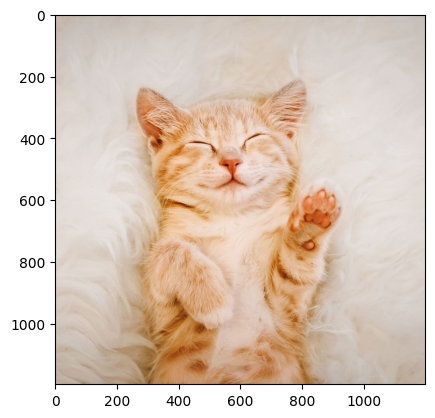

In [4]:
OrgImg=mpimg.imread("cat.jpg")
plt.imshow(OrgImg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


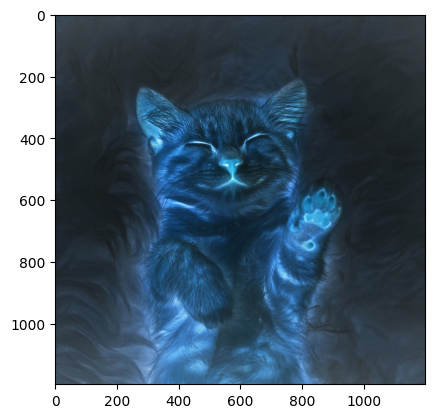

In [21]:
bits=bit(OrgImg)
NegImg=2**bits*np.int_(np.ones(np.shape(OrgImg)))-OrgImg
plt.imshow(NegImg)